# 1. 데이터 보기.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
os.name

'nt'

In [4]:
# 한글 깨짐 방지
if os.name=="nt":
    plt.rcParams["font.family"]='Malgun Gothic' # 맑은 고딕

In [5]:
df=pd.read_csv("./../data/Lakers.csv")
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [6]:
df_copy=df.copy()
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


## 칼럼 설명

* date : 경기 일자
* opponent : 대전 팀
* game_type : 홈 경기 vs 원정 경기
* time : 분, 초
* period : 쿼터 (한 쿼터 당 12분 씩, 동점인 경우 5 쿼터 진행)
* etype : 유형
* team : 팀 구분 (LAL : LA lakers 팀)
* player : 선수 명
* result : 결과
* points : 점수
* type : 세부 행동
* x, y : 상대편 뒤 골대 뒤에서 바라본 (x,y) 좌표이다. 골대의 위치를 표시해준다.

In [7]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
dtype: int64

In [8]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [9]:
df_copy.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [10]:
df_copy.describe(include="object")

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [11]:
df_copy.info() # info = dtypes + isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


* 범주형 변수 : opponent, game_type, period, etype, team, player, result, type (빈도 계산 가능)
* 연속형 변수 : date, time, points, x, y (수치 계산 가능)

In [12]:
print("Opponent : ", df_copy["opponent"].unique())
print("Game_Type :", df_copy["game_type"].unique())
print("Period : ", df_copy["period"].unique())
print("Etype : ", df_copy["etype"].unique())
print("Team : ", df_copy["team"].unique())
print("Player : ", df_copy["player"].unique())

Opponent :  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game_Type : ['home' 'away']
Period :  [1 2 3 4 5]
Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team :  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Player :  [nan 'Pau Gasol' 'Vladimir Radmanovic' 'Derek Fisher' 'Greg Oden'
 'LaMarcus Aldridge' 'Kobe Bryant' 'Travis Outlaw' 'Andrew Bynum'
 'Brandon Roy' 'Steve Blake' 'Joel Przybilla' 'Lamar Odom'
 'Rudy Fernandez' 'Trevor Ariza' 'Jordan Farmar' 'Channing Frye'
 'Sergio Rodriguez' 'Sasha Vujacic' 'Jerryd Bayless' 'Nicolas Batum'
 'Luke Walton' 'Ike Diogu' 'Josh Powell' 'Chris Mihm' 'Chris Kaman'
 'Baron Davis' 'Tim Thomas' 'Cuttino Mobley' 'Al

In [13]:
print("Result :", df_copy["result"].unique())
print("Type : ", df_copy["type"].unique())
# game_type, period, result 등으로 묶어서 나타낼 수 있다.

Result : [nan 'missed' 'made']
Type :  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fade away'
 'running jump' 'delay of game' 'defense 3 second' 'fade away bank'
 'floating jump' 'driving dunk' 'loose ball' 'running bank' 'running dunk'
 'fade away jumper' 'finger roll layup' 'turnaround hook' 'reverse layup'
 'reverse dunk' 'jump hook' 'jump bank' 'double technical' 'running hook'
 'driving jump' 'turnaround bank' 'step back jump' 'turnaround bank hook'
 'pullup bank' 'alley oop layup' 'putback slam dunk' 'flagrant type 1'
 'running reverse layup' 'running finger roll layup' 'reverse slam dunk'
 'hanging technical' 'running slam dunk' 'dri

In [14]:
print("총 데이터의 개수 : ", df_copy.shape[0]*df_copy.shape[1])
print(f"결측치의 개수 : {df_copy.isnull().sum().sum()}, 전체 데이터의 {((df_copy.isnull().sum().sum())/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%를 차지한다.")
print("LAL와 경기한 상대편 팀의 개수 : ", df_copy["opponent"].nunique())
print("LAL의 행동 개수 : ", df_copy["etype"].nunique())
print("LAL의 세부 행동 개수 : ", df_copy["type"].nunique())

총 데이터의 개수 :  450112
결측치의 개수 : 76625, 전체 데이터의 17.02%를 차지한다.
LAL와 경기한 상대편 팀의 개수 :  29
LAL의 행동 개수 :  10
LAL의 세부 행동 개수 :  73


# 2. 데이터를 보고 질문하기.

## 강사님 질문

* LAL의 홈 경기 비율 vs 원정 경기 비율 ?
* 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?
* 이번 시즌에서의 LAL의 경기 결과는?
* LAL 선수들은 코트의 어디 위치에서 어떤 동작을 했는가?

## 나의 질문

* result에 따른 etype의 비율?
* 각 선수의 etype의 개수?
* game_type에 따른 세부 행동 개수?
* 상대팀 경기 횟수?

# 3. 데이터 정비하기.

## 3-1. 시간 타입의 데이터 정비하기.

In [15]:
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [16]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [17]:
df_copy["datetime"]=df_copy["date"].astype("str")+" "+df_copy["time"]
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [18]:
df_copy["datetime"]=pd.to_datetime(df_copy["datetime"], format="%Y%m%d %H:%M:%S")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [19]:
df_copy["date"]=pd.to_datetime(df_copy["date"], format="%Y%m%d")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [20]:
df_copy.dtypes # date와 datetime 모두 datetime으로 변경해주었다.

date         datetime64[ns]
opponent             object
game_type            object
time                 object
period                int64
etype                object
team                 object
player               object
result               object
points                int64
type                 object
x                   float64
y                   float64
datetime     datetime64[ns]
dtype: object

## 3-2. 결측치 처리하기.

In [21]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [22]:
df_copy.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

* player, result, type은 고유한 값이기 때문에 따로 NaN 값을 채워줄 필요가 없다.
* x, y는 좌표이기 때문에, 적절한 값을 대입시켜줘야 한다.

**[tip] x,y에 0을 채워 넣기 전에 실제 데이터에 0이 있는지 확인해야한다. 확인하지 않으면, 새로 채운 값이 실제 값을 가릴 수 있기 때문이다.**
<br/> ➡ 확인해 본 결과, x column 에는 0이 있기 때문에, 다른 값을 채워야 한다.

In [23]:
df_copy["x"].unique() # 0이 들어 있다.

array([nan, 23., 25., 36., 30., 34., 15., 46., 21., 39., 20., 26., 17.,
        8., 31., 47., 14., 29.,  1., 38., 41., 44., 43., 37.,  9.,  6.,
       22., 27., 10., 48., 16., 28., 18., 49.,  0., 42., 32.,  7., 13.,
       33., 11., 12.,  2.,  5., 35., 40.,  3., 51., 24., 45., 19.,  4.,
       50.])

In [24]:
print(df_copy.loc[df_copy["x"]==-1, "x"].index.tolist()) # x=0인 부분은 존재한다.
print(df_copy.loc[df_copy["y"]==0, "y"].index.tolist()) # y=0인 부분은 없다.
# 나는 결측치에 x에는 -1, y에는 0을 대입시켜주었다.

[]
[]


# 4. EDA & Visualization

## 4-1. LAL의 홈 경기 비율 vs 원정 경기 비율 ?

In [25]:
df_copy[["date", "game_type"]]

,date,game_type
0,2008-10-28,home
1,2008-10-28,home
2,2008-10-28,home
3,2008-10-28,home
4,2008-10-28,home
...,...,...
34619,2009-04-14,home
34620,2009-04-14,home
34621,2009-04-14,home
34622,2009-04-14,home


In [26]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [27]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"])["game_type"].count()

date        game_type
2008-10-28  home         416
2008-10-29  away         455
2008-11-01  away         493
2008-11-05  home         503
2008-11-09  home         425
                        ... 
2009-04-07  away         437
2009-04-09  home         498
2009-04-10  away         466
2009-04-12  home         407
2009-04-14  home         471
Name: game_type, Length: 78, dtype: int64

In [28]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [29]:
df_sum=df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()
df_sum['game_type'].value_counts()

home    39
away    39
Name: game_type, dtype: int64

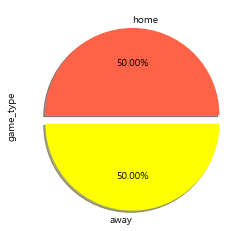

In [30]:
_=df_sum['game_type'].value_counts().plot.pie(colors=["tomato", "yellow"], shadow=True, explode=[0, 0.1], autopct="%.2f%%")
_=plt.savefig("./../images_Lakers/practice.png")

In [31]:
df_drop=df_copy.drop_duplicates(subset=["date"], keep="first") # 앞에 있는 것을 살린다.
df_drop

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-12 12:00:00


In [32]:
df_drop["game_type"].value_counts()

home    39
away    39
Name: game_type, dtype: int64

In [33]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지

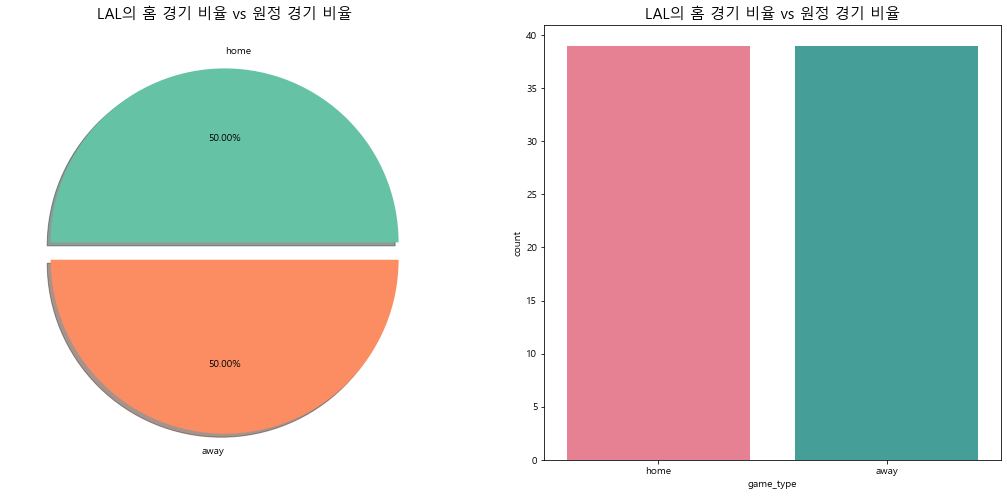

In [34]:
fig,ax=plt.subplots(1, 2, figsize=(18,8))
color_list=sns.color_palette("Set2", df_copy["game_type"].nunique())

_=df_drop["game_type"].value_counts().plot.pie(ax=ax[0], autopct="%.2f%%", explode=[0, 0.1], shadow=True, colors=color_list)
_=ax[0].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)
_=ax[0].set_ylabel("")

_=sns.countplot(data=df_drop, x="game_type", ax=ax[1], palette="husl")
_=ax[1].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)

fig.savefig("./../images_Lakers/LAL의 홈 경기 비율 vs 원정 경기 비율.png", dpi=200, facecolor="#F6F7FB")

## 4-2. 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?

> 단순하게 표기하고 싶으면 countplot을 이용하면 된다.
<br/>만약에 period 별로 etype의 개수를 세고 싶으면 ➡ period, etype groupby 실행하기 ➡ reset_index와 as_index=False 이용하기. ➡ pivot table로 변경하기. ➡ Stacked Bar Graph 그리기.

In [35]:
print("Etype : ", df_copy["etype"].unique())

Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [36]:
df_copy["etype"].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

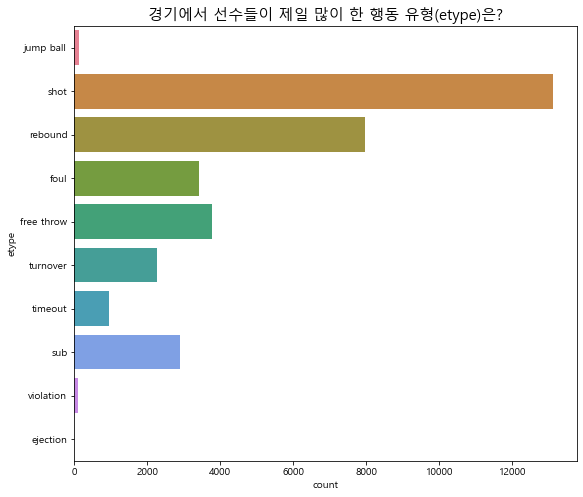

In [37]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))

_=sns.countplot(data=df_copy, y="etype", palette="husl")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype).png", dpi=200, facecolor="#F6F7FB")

In [38]:
df_copy.groupby(["etype", "period"]).size().reset_index() # 위와 아래는 같은 코드이다.

,etype,period,0
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [39]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [40]:
df_copy.groupby(["etype", "period"])["team"].count().reset_index()

,etype,period,team
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [41]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [42]:
df2=df_copy.groupby(["etype", "period"], as_index=False)["team"].count() # reset_index와 동일한 역할을 수행한다.
df2.columns=['etype', 'period', 'total_count']
df2

,etype,period,total_count
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [43]:
df_huePer=pd.pivot_table(df2, index="etype", columns="period", values="total_count")
df_huePer
# 동점인 경우만 5 quarter를 진행하기 때문에, 다른 period의 값 보다는 훨씬 작은 편에 속한다.

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


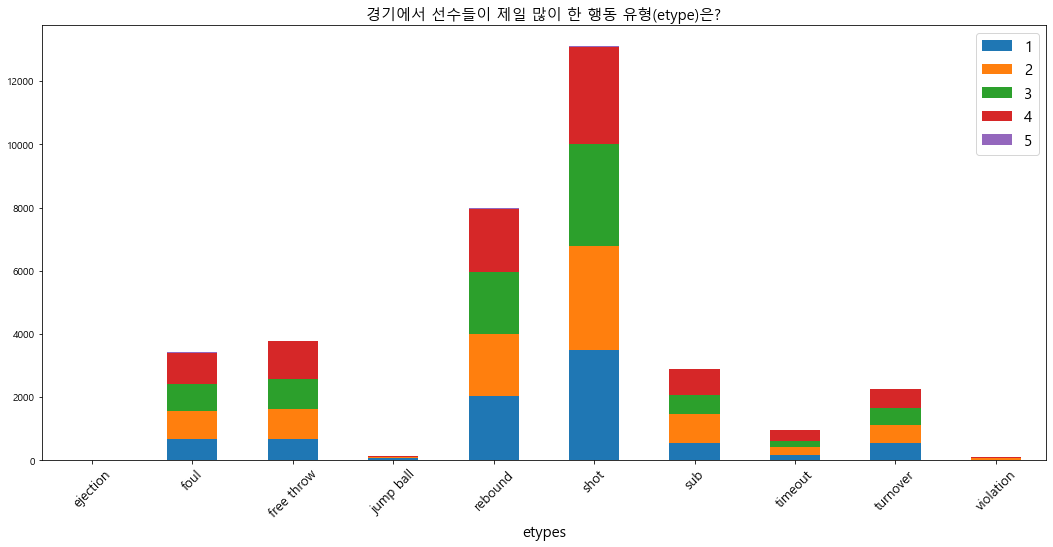

In [44]:
_=df_huePer.plot.bar(stacked=True, figsize=(18,8)) # index : x, columns : stacked
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar.png", dpi=200, facecolor="#F6F7FB")
# stacked 처리한 것이 훨씬 보기 편리하다.
# period 마다 크게 차이는 없다.

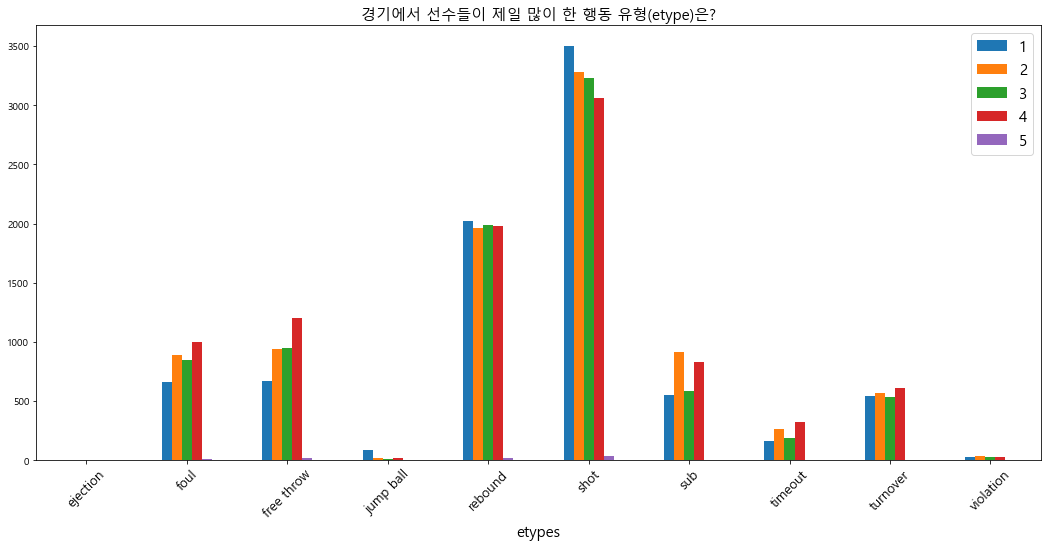

In [45]:
_=df_huePer.plot.bar(figsize=(18,8)) # index : x, columns : hue
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar_hue.png", dpi=200, facecolor="#F6F7FB")

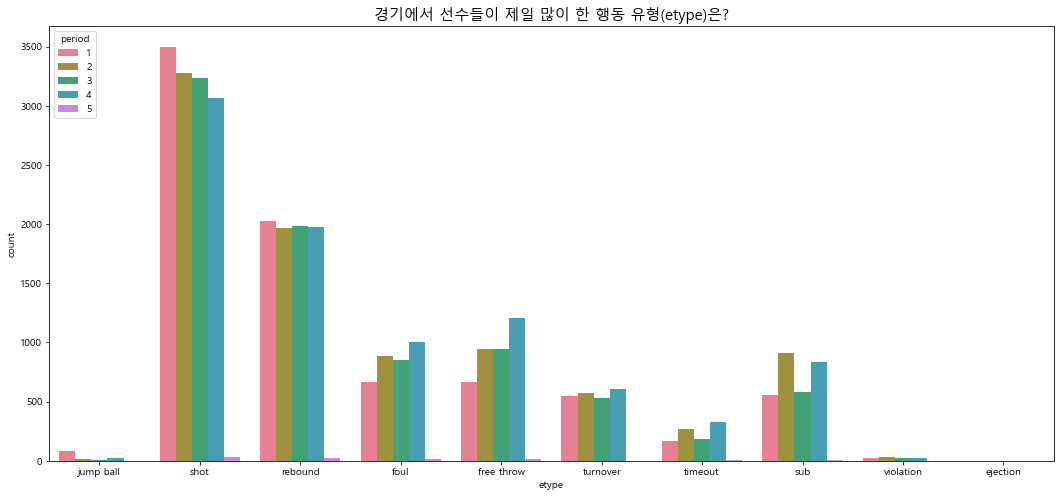

In [46]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))

_=sns.countplot(data=df_copy, x="etype", palette="husl", hue="period")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_sns.png", dpi=200, facecolor="#F6F7FB")

## 4-3. 이번 시즌에서의 LAL의 경기 결과는? 

* 시계열을 통해서 경기 결과를 표현하기. 
* 시간 순으로 나타낸 그래프를 의미한다. 시간이 있으면 시계열 그래프를 그려보는 것이 도움이 된다.

In [47]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [49]:
df_copy["time"].value_counts()

0:00     357
0:01     140
0:03     108
0:02     101
0:04      86
        ... 
11:51     16
11:53      3
11:52      3
11:56      2
11:57      1
Name: time, Length: 717, dtype: int64

In [50]:
df_copy["result"].unique()

array([nan, 'missed', 'made'], dtype=object)

In [52]:
score=df_copy["result"].isin(["made"]) # isin 사용 시에 대괄호 잊지 않기.
score # index를 이용해서 원하는 행들을 추출할 수 있다. (result가 이긴 행만 알고 싶다.)

0        False
1        False
2        False
3        False
4        False
         ...  
34619     True
34620     True
34621    False
34622    False
34623    False
Name: result, Length: 34624, dtype: bool

In [54]:
df_copy.loc[score,:].head() # result가 성공인 경우를 의미한다.

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,NaN,NaN,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [66]:
df_success=df_copy.loc[score, ["date", "team", "points"]].groupby(["date", "team"]).sum()
df_success # result가 성공인 경우만 모아서 포인트의 합계를 구하는 집계 함수를 이용하기.

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [67]:
df_success=df_success.reset_index()
df_success

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [68]:
# LAL vs 상대편으로 결과 나눠보기.
df_LAL=df_success.loc[df_success["team"]=="LAL"]
df_NotLAL=df_success.loc[df_success["team"]!="LAL"]

In [69]:
df_LAL # LAL 팀

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [70]:
df_NotLAL # 상대 팀

,date,team,points
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
4,2008-11-01,DEN,97
6,2008-11-05,LAC,88
8,2008-11-09,HOU,82
...,...,...,...
147,2009-04-07,SAC,104
148,2009-04-09,DEN,102
151,2009-04-10,POR,106
153,2009-04-12,MEM,75


In [75]:
df_merge=pd.merge(df_LAL, df_NotLAL, on="date") # 붙이는 key를 date라고 지정한다. 그리고 두 개의 df를 합쳐준다.
df_merge.columns=["date", "LAL", "points_LAL", "NotLAL", "points_NotLAL"]
df_merge

,date,LAL,points_LAL,NotLAL,points_NotLAL
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [99]:
# LAL의 승리 df와 패배 df를 구분하자.
win=df_merge.loc[df_merge.loc[:, "points_LAL"]>df_merge.loc[:, "points_NotLAL"]] # 승리 df
loss=df_merge.loc[df_merge.loc[:, "points_LAL"]<df_merge.loc[:, "points_NotLAL"]] # 패배 df

In [100]:
df_merge.shape[0]

78

In [101]:
win

,date,LAL,points_LAL,NotLAL,points_NotLAL
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
72,2009-04-05,LAL,88,LAC,85
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
76,2009-04-12,LAL,92,MEM,75


In [102]:
df_merge.loc[win.index, :].shape[0]

63

In [103]:
# LAL가 이긴 날과 진 날을 구분하자.
win=df_merge.loc[df_merge["points_LAL"]>df_merge["points_NotLAL"], :] # 승리한 index
lose=df_merge[df_merge["points_LAL"]<df_merge["points_NotLAL"]] # 패배한 index

print(f"LA Lakers는 전체 경기 {df_merge.shape[0]}회 중에서 {df_merge.loc[win.index, :].shape[0]}번 우승하였다.")

LA Lakers는 전체 경기 78회 중에서 63번 우승하였다.


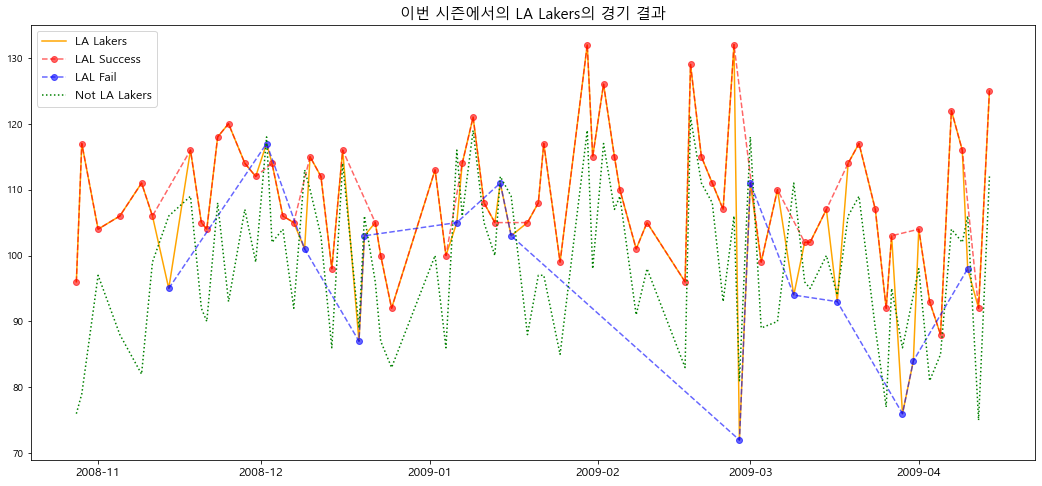

In [148]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))
_=ax.set_title("이번 시즌에서의 LA Lakers의 경기 결과", size=15)

# LAL 시간에 따른 경기 결과 점수를 시계열 그래프로 보여주기.
_=plt.plot(df_LAL["date"], df_LAL["points"], alpha=1, color="orange", label="LA Lakers")

# LAL가 이긴 날은 빨간색, LAL가 진 날은 파란색으로 표기하기.
_=plt.plot(win["date"], win["points_LAL"], color="red", label="LAL Success", marker="o", linestyle="--", alpha=0.6)
_=plt.plot(loss["date"], loss["points_LAL"], color="blue", label="LAL Fail", marker="o", linestyle="--", alpha=0.6)

# 상대팀 점수를 초록색 점선으로 나타내기.
_=plt.plot(df_NotLAL["date"], df_NotLAL["points"], alpha=1, color="green", linestyle=":", label="Not LA Lakers")

_=plt.legend(fontsize=12, loc="upper left")
_=plt.xticks(fontsize=12)

fig.savefig("./../images_Lakers/이번 시즌 LAL 시계열 그래프.png", dpi=200, facecolor="#F6F7FB")

[tip] 그래프가 복잡해보이더라도, LA Lakers가 언제 이기고 졌는지 확실하게 알 수 있는 그래프이다.

## 4-4. LAL 선수들은 코트의 어디 위치에서 어떤 동작을 했는가?

In [152]:
# 이번에는 LA Lakers 팀만 볼 것이다.
lal=df_copy.loc[df_copy["team"]=="LAL"]
lal

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,NaN,NaN,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,NaN,NaN,2009-04-14 00:27:00


c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\ajouu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


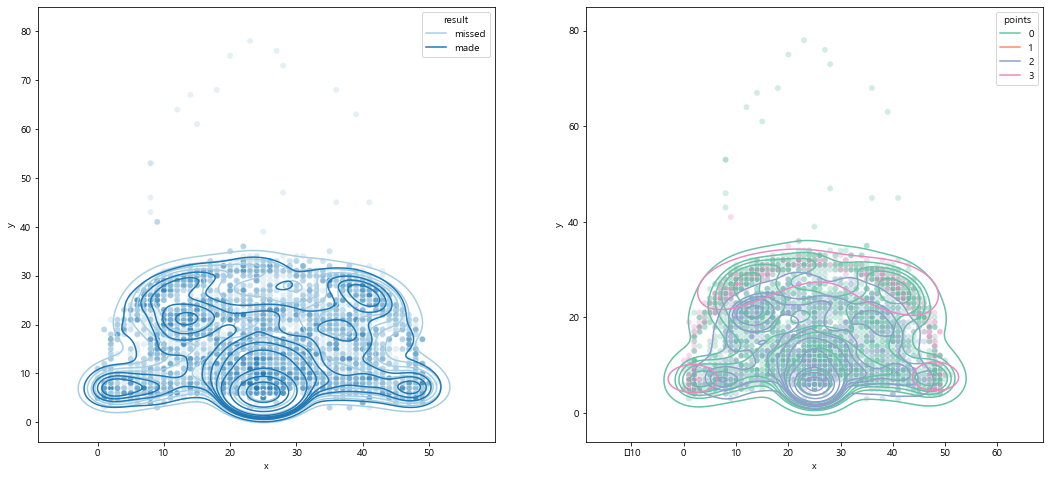

In [164]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))

# 득점 성공 / 실패 분포
_=sns.scatterplot(data=lal, x="x", y="y", hue="result", alpha=0.3, ax=ax[0], palette="Paired")
_=sns.kdeplot(data=lal, x="x", y="y", hue="result", ax=ax[0], palette="Paired")

# 득점 점수 별 분포
_=sns.scatterplot(data=lal, x="x", y="y", hue="points", alpha=0.3, ax=ax[1], palette="Set2")
_=sns.kdeplot(data=lal, x="x", y="y", hue="points", ax=ax[1], palette="Set2")

In [175]:
lal["type"]

1            hook
2             off
3           layup
4             off
5            hook
           ...   
34616         NaN
34617         NaN
34618    personal
34621         NaN
34623         def
Name: type, Length: 17235, dtype: object

In [182]:
# 가장 많이 한 세부 행동 10개 고르기.
lal_10=lal.loc[lal["type"].isin(lal["type"].value_counts().head(10).index), :]
lal_10 # 세부 행동이 너무 많기 때문에, 10개만 그려보기.

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,2009-04-14,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,2009-04-14 02:12:00
34605,2009-04-14,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,NaN,NaN,2009-04-14 02:06:00
34611,2009-04-14,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,NaN,NaN,2009-04-14 01:27:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,NaN,NaN,2009-04-14 00:42:00


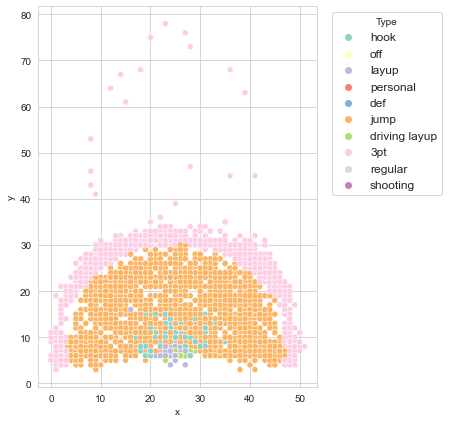

In [196]:
sns.set_style("whitegrid")
fig, ax=plt.subplots(1, 1, figsize=(5,7))

_=sns.scatterplot(data=lal_10, x="x", y="y", hue="type", alpha=1, palette="Set3")
_=plt.legend(fontsize=12, bbox_to_anchor=(1.03, 1), title="Type")

fig.savefig("./../images_Lakers/type 상위 10개 산점도.png", dpi=200, facecolor="#F6F7FB")